In [165]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo

In [11]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Final_csv.csv')

In [3]:
df

,rating,country,date,review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,...,Value For Money,Recommended,Airlines,Verified,review_length,roberta_polarity,roberta_sentiment,CODE,Latitude,Longitude
0,3.0,Italy,04-01-2024,Very cheeky check-in system: this did not ha...,Couple Leisure,Economy Class,Manchester to Milan,March 2024,1.0,2.0,...,2.0,0,ryanair,0,108,-0.721132,-1,IT,42.638426,12.674297
1,1.0,Spain,03-28-2024,Terrible customer service. Handling in Marra...,Family Leisure,Economy Class,Marrakech to Sevilla,March 2024,2.0,4.0,...,3.0,0,ryanair,0,594,-0.652707,-1,ES,39.326068,-4.837979
2,5.0,United Kingdom,03-18-2024,Luton to Faro and return Faro to Luton 10 da...,Couple Leisure,Economy Class,Luton to Faro,March 2024,1.0,3.0,...,2.0,0,ryanair,1,211,-0.371360,-1,GB,54.702354,-3.276575
3,1.0,Canada,03-16-2024,Very bad airline. I spent 100 pounds check i...,Family Leisure,Economy Class,Edinburgh to Stansted,March 2024,1.0,1.0,...,2.0,0,ryanair,1,84,-0.735222,-1,CA,61.066692,-107.991707
4,7.0,United Kingdom,03-10-2024,"When things go wrong with low-cost carriers,...",Solo Leisure,Economy Class,Stansted to Sofia,March 2024,3.0,4.0,...,5.0,1,ryanair,1,111,-0.089758,0,GB,54.702354,-3.276575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12171,1.0,South Africa,06-13-2015,"Twice now I have flown Etihad, booked on South...",Solo Leisure,Economy Class,Jakarta to Johannesburg via Abu Dhabi,June 2015,3.0,2.0,...,3.0,0,etihad-airways,0,366,-0.610677,-1,ZA,-28.816624,24.991639
12172,6.0,United Kingdom,06-13-2015,Flew out to Sydney from Heathrow on the 14th M...,Business,Business Class,To Sydney from Heathrow,May 2015,3.0,2.0,...,3.0,1,etihad-airways,0,120,0.282135,1,GB,54.702354,-3.276575
12173,9.0,United States,06-12-2015,I was expecting something special on these fli...,Solo Leisure,First Class,Tokyo-Abu Dhabi-Los Angeles,June 2015,5.0,5.0,...,5.0,1,etihad-airways,0,63,0.716298,1,US,39.783730,-100.445882
12174,2.0,Malaysia,06-12-2015,Had two journeys with Etihad within 3 weeks an...,Solo Leisure,Economy Class,LHR to Kuala Lumpur via Abu Dhabi,June 2015,2.0,1.0,...,1.0,0,etihad-airways,0,353,-0.616909,-1,MY,4.569375,102.265682


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12176 entries, 0 to 12175
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  12176 non-null  float64
 1   country                 12176 non-null  object 
 2   date                    12176 non-null  object 
 3   review                  12176 non-null  object 
 4   Type Of Traveller       12176 non-null  object 
 5   Seat Type               12176 non-null  object 
 6   Route                   12176 non-null  object 
 7   Date Flown              12176 non-null  object 
 8   Seat Comfort            12176 non-null  float64
 9   Cabin Staff Service     12176 non-null  float64
 10  Food & Beverages        12176 non-null  float64
 11  Inflight Entertainment  12176 non-null  float64
 12  Ground Service          12176 non-null  float64
 13  Value For Money         12176 non-null  float64
 14  Recommended             12176 non-null

# Time series plots

In [119]:
import pandas as pd
import plotly.express as px

# Convert to pd.datetime format
df['Date Flown tmp'] = pd.to_datetime(df['Date Flown'], format='%B %Y')

# Calculate the monthly average ratings for each airline
airline_ratings = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M'), 'Airlines'])['rating'].mean().reset_index()

# Plot the monthly average ratings and trend lines for each airline using Plotly Express
for airline in df['Airlines'].unique():
    airline_data = airline_ratings[airline_ratings['Airlines'] == airline]
    fig = px.scatter(airline_data, x='Date Flown tmp', y='rating', 
                     trendline='lowess', title=f'Average Rating for {airline} over time',
                     custom_data=['Date Flown tmp'], 
                    labels={'Date Flown tmp': 'Date Flown', 'Average Rating': 'Average Rating'})  # Add custom data for hover labels
    fig.update_traces(line=dict(color='red'))  # Set trend line color to red
    fig.update_yaxes(title_text='Average Rating')  # Set y-axis label
    fig.update_layout(xaxis_title='Date Flown', yaxis_title='Average Rating', hovermode='x unified')  # Enable unified hover mode
    fig.update_traces(hovertemplate='<b>Average Rating:</b> %{y}')  # Customize hover label template for scatter points
    fig.update_xaxes(nticks=12)
    fig.show()


In [121]:
# Calculate the monthly average ratings for each airline
ratings = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M')])['rating'].mean().reset_index()


fig = px.scatter(ratings, x='Date Flown tmp', y='rating', 
                 trendline='lowess', title=f'Average Rating over time',
                 custom_data=['Date Flown tmp'], 
                labels={'Date Flown tmp': 'Date Flown', 'Average Rating': 'Average Rating'})  # Add custom data for hover labels
fig.update_traces(line=dict(color='red'))  # Set trend line color to red


fig.update_xaxes(nticks=20)
fig.update_layout(xaxis_title='Date Flown', yaxis_title='Average Rating', hovermode='x unified')  # Enable unified hover mode
fig.update_traces(hovertemplate='<b>Average Rating:</b> %{y}')  # Customize hover label template for scatter points

fig.show()

In [160]:
# Group by 'Date Flown tmp' (monthly) and 'Airlines' and count the number of flights
monthly_flights = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M'), 'Airlines']).size().reset_index(name='Number of Customers')

# Plot the line plot using Plotly Express
fig = px.line(monthly_flights, x='Date Flown tmp', y='Number of Customers', color='Airlines', 
              title='Number of reviewers for each airline over time',
              labels={'Number of Customers': 'Number of reviewers', 'Date Flown tmp': 'Date'})
fig.update_layout(xaxis_title='Date Flown', yaxis_title='Number of Reviewers', hovermode='x')
fig.show()

In [166]:

pyo.offline.plot(fig, filename='my_plot.html', auto_open=False)

'my_plot.html'

In [153]:
# Group by 'Date Flown tmp' (monthly) and 'Airlines' and count the number of flights
monthly_flights = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M')]).size().reset_index(name='Number of Customers')

# Plot the line plot using Plotly Express
fig = px.line(monthly_flights, x='Date Flown tmp', y='Number of Customers', 
              title='Number of reviewers over time',
              labels={'Number of Customers': 'No. of reviewers', 'Date Flown tmp': 'Date'})
fig.update_layout(xaxis_title='Date Flown', yaxis_title='No. of reviewers', hovermode='x')
fig.show()

In [154]:
# Group by 'Date Flown tmp' (monthly) and 'Airlines' and count the number of flights
monthly_sentiments = df.groupby([pd.Grouper(key='Date Flown tmp', freq='M'), 'roberta_sentiment']).size().reset_index(name='Number of Customers')

# Filter by specifying time range
monthly_sentiments = monthly_sentiments[(monthly_sentiments['Date Flown tmp'] >= '2020-01-01') & (monthly_sentiments['Date Flown tmp'] < '2024-01-01')]

# Define labels for each sentiment
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

# Replace sentiment values with labels
monthly_sentiments['roberta_sentiment'] = monthly_sentiments['roberta_sentiment'].map(sentiment_labels)

# plot the number of reviewers stratified by sentiments
fig = px.line(monthly_sentiments, x='Date Flown tmp', y='Number of Customers', color='roberta_sentiment',
                 title=f'Number of reviewers over time stratified by sentiments', 
                labels={'Date Flown tmp': 'Month', 'Number of Customers': 'No. of reviewers'})

fig.update_layout(xaxis_title='Date Flown', yaxis_title='No. of reviewers', hovermode='x')  # Enable unified hover mode
fig.show()

# Box plots

In [124]:
# Box plots 
def plot_grouped_box(df,feat_x,feat_y):
    """
    Plot the distribution of feat_x for different values of feat_y.
    """
#     plt.figure(figsize=(6,6))
    sns.set(style="whitegrid")
    ax = sns.catplot(data=df, x=feat_x, y=feat_y, kind='box', palette='Set2', height=4, aspect=1.25)
    ax.set(xlabel=feat_x, ylabel=feat_y)
#     plt.tight_layout()
#     plt.show()
    return

/Users/manan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



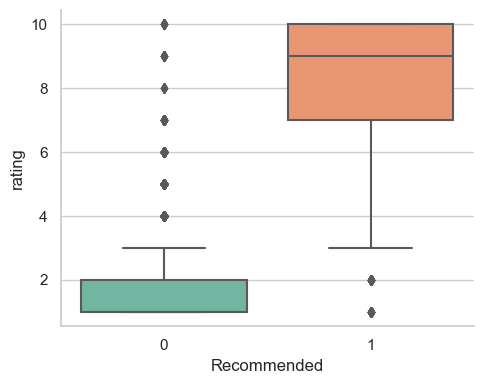

In [125]:
feat_x = 'Recommended'
feat_y = 'rating'
plot_grouped_box(df,feat_x,feat_y)

/Users/manan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



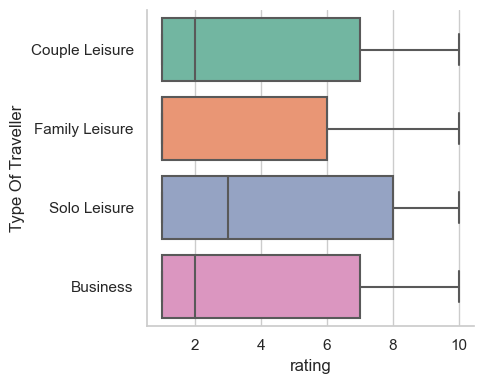

In [8]:
feat_x = 'rating'
feat_y = 'Type Of Traveller'
plot_grouped_box(df,feat_x,feat_y)

/Users/manan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



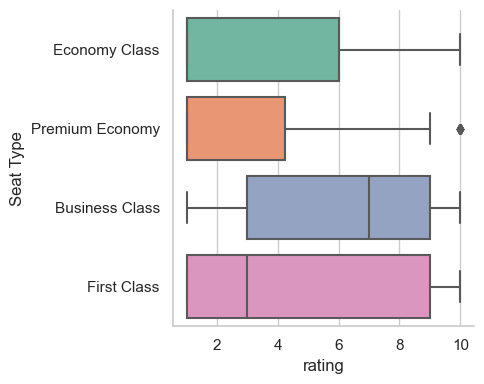

In [9]:
feat_x = 'rating'
feat_y = 'Seat Type'
plot_grouped_box(df,feat_x,feat_y)

# Bar plots

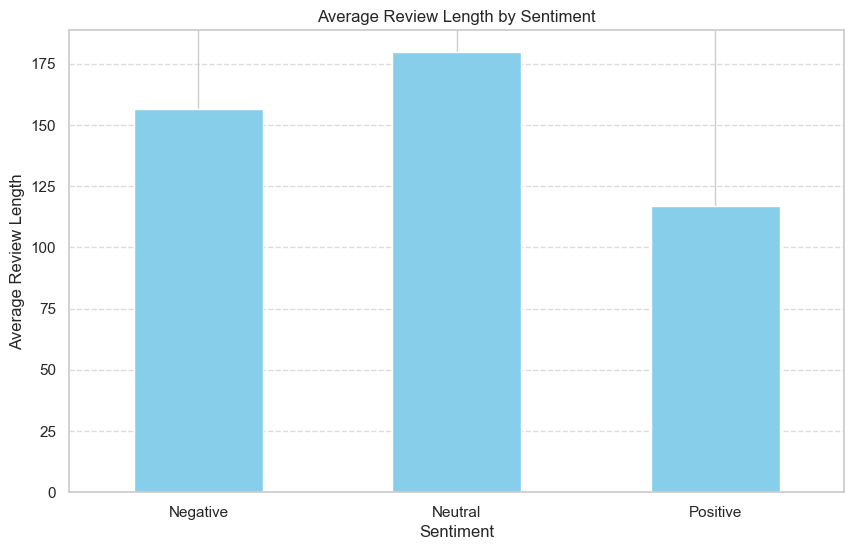

In [126]:
# Mapping numeric sentiment values to labels
sentiment_labels = {'-1': 'Negative', '0': 'Neutral', '1': 'Positive'}

# Group by rating and calculate average review length
avg_review_length = df.groupby('roberta_sentiment')['review_length'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_review_length.plot(kind='bar', color='skyblue')
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.xticks(range(len(avg_review_length.index)), [sentiment_labels[str(sentiment)] for sentiment in avg_review_length.index], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

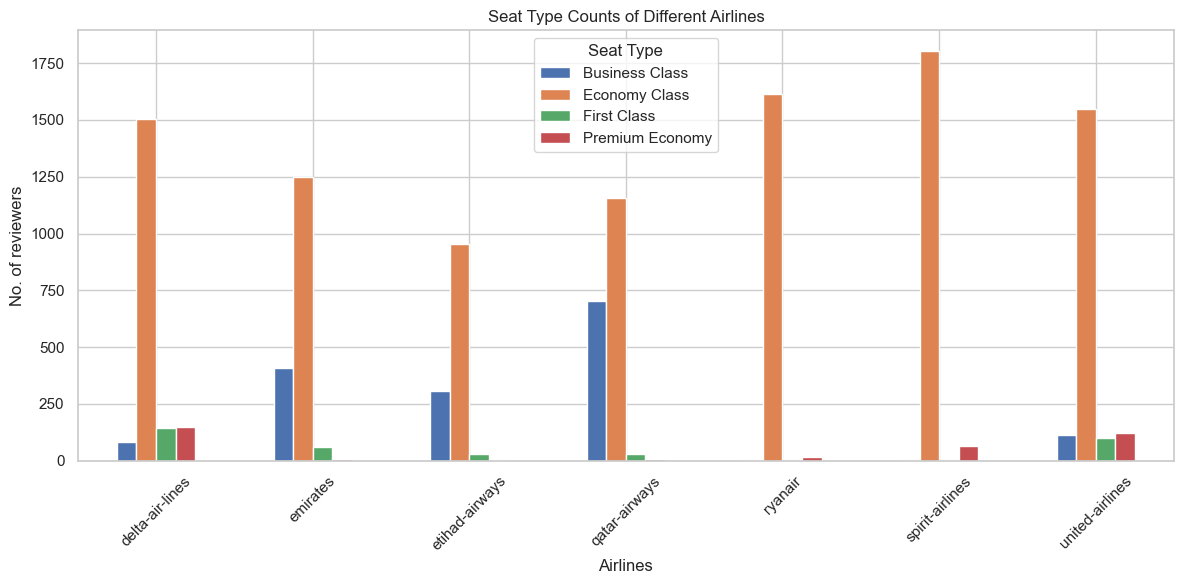

In [155]:
df_filtered = df[['Airlines', 'Seat Type']]

# Group by Airlines and Seat Type and count occurrences
seat_type_counts = df_filtered.groupby(['Airlines', 'Seat Type']).size().unstack(fill_value=0)

seat_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Seat Type Counts of Different Airlines')
plt.xlabel('Airlines')
plt.ylabel('No. of reviewers')
plt.xticks(rotation=45)
plt.legend(title='Seat Type')
plt.tight_layout()
plt.show()

In [156]:
# Group by airlines and sum the 'recommended' column to get the count of recommended customers for each airline
recommended_customers = df.groupby('Airlines')['Recommended'].sum().reset_index()

# Create the plotly bar chart
fig = px.bar(recommended_customers, x='Airlines', y='Recommended', color='Airlines',
             title='Number of reviewers who recommended for each airline',
             labels={'Airlines': 'Airlines', 'Recommended': 'No. of reviewers'},
             color_discrete_sequence=['green'])

# Rotate x-axis labels for better readability
fig.update_layout(xaxis=dict(tickangle=45))

fig.update_layout(showlegend=False, width=700, height=500)
# Show the plot
fig.show()

In [157]:
# Group by Airline and Sentiment, count occurrences, and unstack the result
grouped = df.groupby(['Airlines', 'roberta_sentiment']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Define labels for each sentiment
sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

# Define colors for each sentiment
colors = {-1: 'midnightblue', 0: 'darkcyan', 1: 'orange'}

# Create traces for each sentiment category
traces = []
for sentiment, color in colors.items():
    trace = go.Bar(
        x=grouped.index,
        y=grouped[sentiment],
        name=sentiment_labels[sentiment],
        marker=dict(color=color)
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Proportion of Sentiment Categories for Each Airline',
    xaxis=dict(title='Airline'),
    yaxis=dict(title='Proportion'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


/var/folders/w5/v111nb5n0gq56pgtj_1g2drm0000gn/T/ipykernel_79007/3299645644.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/w5/v111nb5n0gq56pgtj_1g2drm0000gn/T/ipykernel_79007/3299645644.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




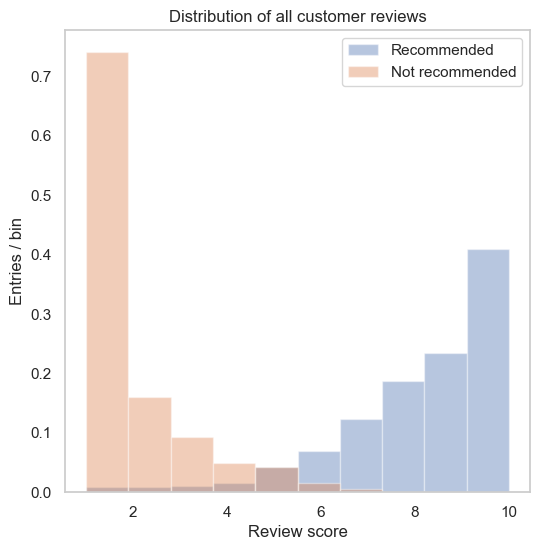

In [158]:
def plot_two_hists_comp_sns(df_1,df_2,label_1,label_2,feat,bins,title,x_label,y_label):
    """
    Plot two histograms of a given feature in two different datasets.
    """
    plt.figure(figsize=(6,6))
    sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
    sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
    plt.legend(loc='best')
    plt.show()
    return

df_recommended = df[df['Recommended']==1].copy()
df_not_recommended = df[df['Recommended']==0].copy()

plot_two_hists_comp_sns(df_1=df_recommended,
                        df_2=df_not_recommended,
                        label_1='Recommended',
                        label_2='Not recommended',
                        feat='rating',
                        bins=10,
                        title='Distribution of all customer reviews',
                        x_label='Review score',
                        y_label='Entries / bin'
                        )

# Word clouds for Positive and Negative sentiment category

In [13]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import nltk

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Perform Part-of-Speech tagging
    pos_tags = pos_tag(words)
    
    # Keep only verbs and adjectives
    filtered_words = [word for word, pos in pos_tags if pos.startswith('V') or pos.startswith('J')]
    
    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Remove stopwords
    cleaned_text = ' '.join([word for word in filtered_words if word not in stop_words])
    
    return cleaned_text

# Function to generate word clouds
def generate_word_cloud(sentiment_label, text_data, colormap):
    # Generate word frequencies
    word_freq = Counter(text_data.split())
    # Generate word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10, 
                colormap=colormap).generate_from_frequencies(word_freq)
    # Plot word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f'Word Cloud for {sentiment_label} Reviews')
    plt.savefig(f'{sentiment_label}_word_cloud.png')
    plt.show()

# Extracting Positive, Negative, Neutral reviews
positive_reviews = df[df['roberta_sentiment'] == 1]
negative_reviews = df[df['roberta_sentiment'] == -1]
neutral_reviews = df[df['roberta_sentiment'] == 0]



[nltk_data] Downloading package punkt to /Users/manan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/manan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/manan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


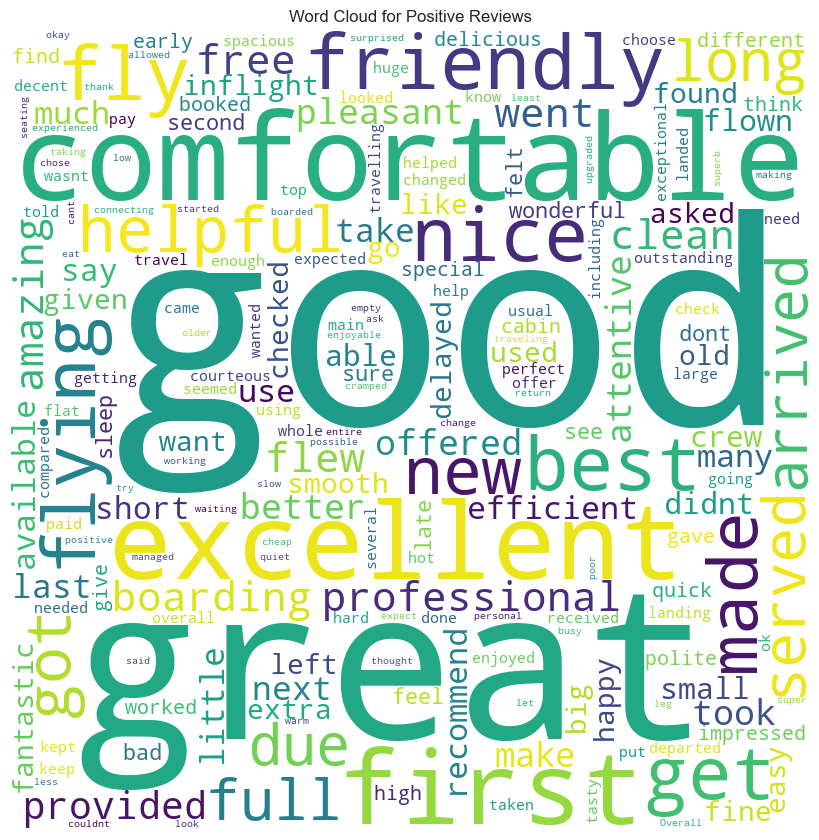

In [168]:
generate_word_cloud('Positive', ' '.join(positive_reviews['review'].apply(preprocess_text)), colormap='viridis')

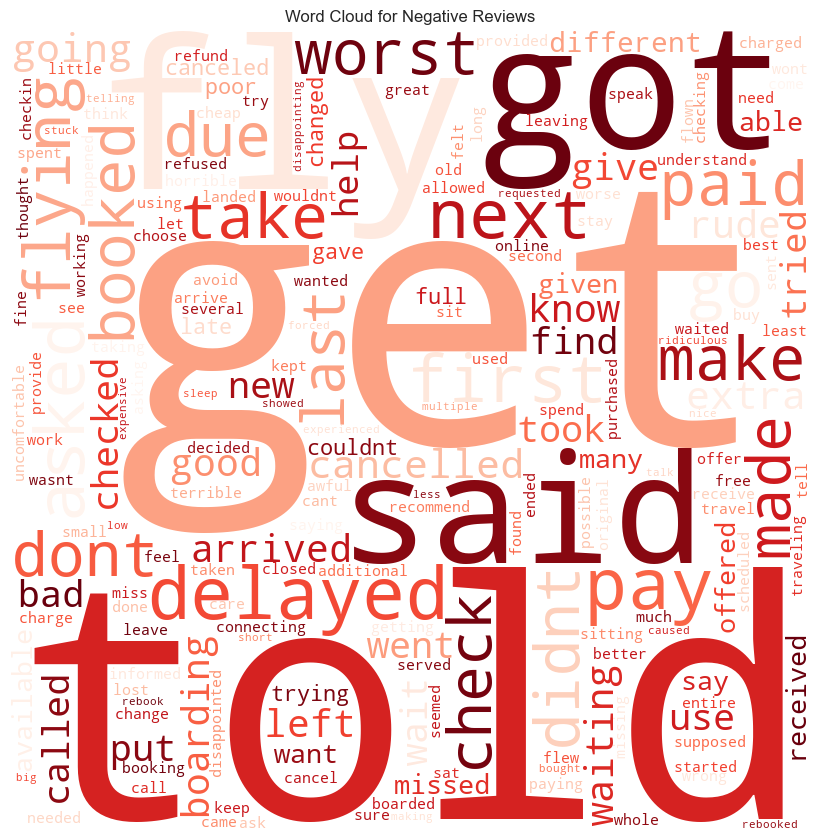

In [169]:
generate_word_cloud('Negative', ' '.join(negative_reviews['review'].apply(preprocess_text)), colormap='Reds')

# Correlation heatmap for different aspects of ratings

In [128]:
import plotly.graph_objects as go
import numpy as np

# Calculate correlation matrix
correlation_matrix = df[['rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment']].corr()

# Create figure
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.index,
        y=correlation_matrix.columns,
        colorscale='Viridis'))

# Add annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        fig.add_annotation(x=correlation_matrix.index[j], y=correlation_matrix.columns[i],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False, font=dict(color='white', size=12))

# Update layout
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Rating Categories'),
    yaxis=dict(title='Rating Categories'))

# Show plot
fig.show()


# Line plot for average reatings

In [159]:
# Calculate the average ratings and standard errors for each combination of "Seat Type" and "Type Of Traveller"
avg_ratings = df.groupby(["Seat Type", "Type Of Traveller"])["rating"].agg(['mean', 'sem']).reset_index()
avg_ratings.columns = ['Seat Type', 'Type Of Traveller', 'Average Rating', 'Standard Error']

# Create the interactive interaction plot with error bounds
fig = go.Figure()

for traveler_type in avg_ratings['Type Of Traveller'].unique():
    traveler_data = avg_ratings[avg_ratings['Type Of Traveller'] == traveler_type]
    fig.add_trace(go.Scatter(x=traveler_data['Seat Type'], y=traveler_data['Average Rating'],
                            mode='lines+markers', name=traveler_type,
                            error_y=dict(type='data', array=traveler_data['Standard Error'])))

fig.update_layout(
    title='Average rating stratified by Seat Type and Type of Traveller',
    xaxis_title='Seat Type',
    yaxis_title='Average Rating',
    legend_title='Type Of Traveller',
    font=dict(size=14),
    width=800,
    height=600,
    margin=dict(l=80, r=80, t=80, b=80)
)

fig.show()

# Summary statistics

In [29]:
# Statistics of ratings
df['rating'].describe()

count    12176.000000
mean         3.877546
std          3.457461
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max         10.000000
Name: rating, dtype: float64

**Overview of Conclusions:**

1. **Skewed Distribution**: The distribution of ratings appears to be heavily skewed towards lower ratings, as indicated by the relatively low mean compared to the median and the high standard deviation. This suggests that a significant proportion of reviewers may have had negative experiences or provided lower ratings.

2. **Variability in Ratings**: The high standard deviation indicate that there is considerable variability in the opinions of reviewers. This variability could stem from differences in individual experiences, expectations, and preferences.

3. **Positive Skewness**: The data shows positive skewness, with more ratings concentrated towards the lower end of the scale and a longer tail towards higher ratings. This suggests that while there are some highly positive ratings, the majority of ratings tend to be lower.

4. **Potential Issues**: The presence of a large number of low ratings, as indicated by the 25th percentile being 1, may signal potential issues or areas for improvement in the flight experiences provided by the airlines.

In [30]:
# Percentage of recommended flights
percentage_recommended = (df['Recommended'].sum() / len(df)) * 100
print("Percentage of Recommended Flights:", percentage_recommended)

Percentage of Recommended Flights: 32.284822601839686


**Overview of Conclusions:**

1. **Recommendation Rate**: A recommendation rate of around 32% suggests a lower level of satisfaction among the customers. 

2. **Room for Improvement**: The percentage of recommended flights falling below 50% suggests that there may be areas where airlines can enhance their services or address issues to increase customer satisfaction and the likelihood of recommendations.

In [31]:
# Statistics of review length
df['review_length'].describe()

count    12176.000000
mean       147.497947
std        107.187537
min         15.000000
25%         75.000000
50%        117.000000
75%        186.000000
max        957.000000
Name: review_length, dtype: float64

**Overview of Conclusions**:

1. **Varied Review Lengths**: The summary statistics show a wide range of review lengths, measured in terms of word count, ranging from 15 to 957 words. This indicates that reviewers have provided feedback across a spectrum of levels of detail.

2. **Average Review Length**: The average review length, measured in terms of word count, of approximately 147.50 words suggests that, on average, reviewers tend to provide relatively concise feedback. 

3. **Distribution of Review Lengths**: The quartiles (25th, 50th, and 75th percentiles) indicate that the majority of reviews are relatively short, with 75% of reviews having a word count of 186 words or fewer.